In [10]:
import pandas as pd

target_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
df = pd.read_csv(target_url, header=None, prefix="V")
df.columns = ['Id','RI','Na', 'Mg', 'Al', 'Si','K', 'Ca', 'Ba', 'Fe', 'Type']
df = df.set_index("Id")#must focus on spelling

print ("数据集规模：",df.shape)

数据集规模： (214, 10)


### 绘制标准化后的箱线图

此图的显示有相当数量的异常点（和前面的例子相比较）, 导致这个情况的原因有：

- 这是一个分类问题，不需要属性值和类别之间的连续性；

- 也不能期望属性值之间的连续性；

- 这个数据集的数据是非平衡的，成员最多的类有76个样本，而成员最少的类仅有6个样本。

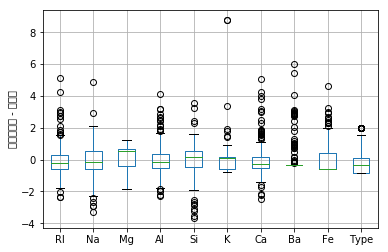

In [11]:
import matplotlib.pyplot as plt

((df - df.mean()) / df.std()).boxplot()
plt.ylabel("四分位间距 - 标准化")
plt.show()

### 平行坐标图

由图中结果发现，深蓝线聚集度比较好，但经常处于某些属性的边缘；棕色的线聚集度也不错，并且基本处于中心附近。

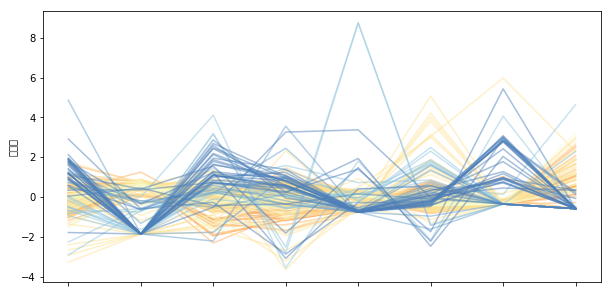

In [18]:
import numpy as np
_lim = (df.shape[1]-1)

_df = (df-df.mean())/df.std()
_xs = _df.iloc[:,_lim]#/7.0
_xs = 1.0/(1.0+np.exp(-_xs))
plt.figure(figsize=(10, 5))
for i in range(df.shape[0]): 
    _df.iloc[i,1:_lim].plot(color=plt.cm.RdYlBu(_xs.iloc[i]),alpha=0.5)
plt.ylabel("属性值")
plt.show()

### 相关性热图

本例的相关性热图表明：属性之间大部分是弱相关。

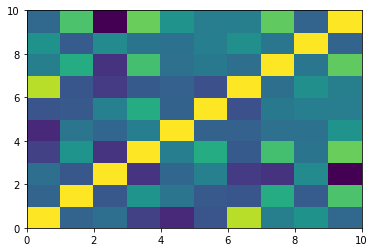

In [20]:
plt.pcolor(df.corr())
plt.show()